# Numpy images

## [Download exercises zip](../_static/generated/matrices-numpy.zip)

[Browse files online](https://github.com/DavidLeoni/softpython-en/tree/master/matrices-numpy)

Images are a direct application of matrices, and show we can nicely translate a matrix cell into a pixel on the screen.

Typically, images are divided into color channels: a common scheme is the RGB model, which stands for Red Green and Blue. In this tutorial we will load an image where each pixel is made of three integer values ranging from 0 to 255 included. Each integer indicates how much of a color component is present in the pixel, with zero meaning absence and 255 bright colors.

### What to do

- unzip exercises in a folder, you should get something like this: 

```
matrices-numpy
    matrices-numpy.ipynb     
    matrices-numpy-sol.ipynb
    numpy-images.ipynb
    numpy-images-sol.ipynb    
    jupman.py
```

<div class="alert alert-warning">

**WARNING**: to correctly visualize the notebook, it MUST be in an unzipped folder !
</div>


- open Jupyter Notebook from that folder. Two things should open, first a console and then browser. The browser should show a file list: navigate the list and open the notebook `matrices-numpy/numpy-images.ipynb`
- Go on reading that notebook, and follow instuctions inside.


Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`
- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`
- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`
- If the notebooks look stuck, try to select `Kernel -> Restart`

## Introduction

Let's load the image:

In [1]:
# this is *not* a python command, it is a Jupyter-specific magic command,
# to tell jupyter we want the graphs displayed in the cell outputs
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

img = mpimg.imread('lulu.jpg')
#img = mpimg.imread('il-piccolo-principe.jpg')
#img = mpimg.imread('rifugio-7-selle.jpg')
#img = mpimg.imread('alright.jpg')

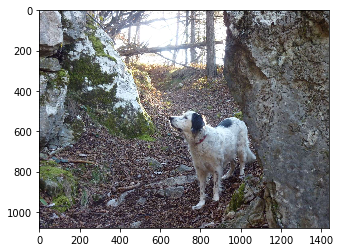

In [2]:
plt.imshow(img)

### Monochrome

For an easy start, we first get a monochromatic view of the image we call `gimg`:

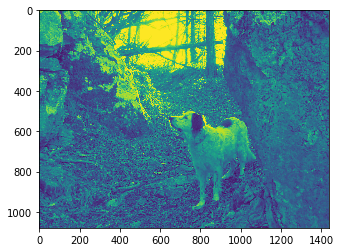

In [3]:
gimg = img[:,:,0]   # this trick selects only one channel (the red one)

plt.imshow(gimg)

If we have taken the RED, why is it shown GREEN?? For Matplotlib,  the picture is only a square matrix of integer numbers, for now it has no notion of the best color scheme we would like to see:

In [4]:
print(gimg)

[[209 209 210 ... 117 118 117]
 [214 214 215 ... 112 116 117]
 [217 217 217 ... 105 110 114]
 ...
 [ 36  33  30 ...  72  67  64]
 [ 42  36  31 ...  70  65  61]
 [ 37  31  24 ...  68  63  60]]


In [5]:
type(gimg)

numpy.ndarray

By default matplotlib shows the intensity of light using with a greenish colormap. 

Luckily, [many color maps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) are available, for example the `'hot'` one:

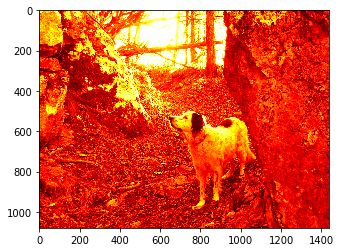

In [6]:
plt.imshow(gimg, cmap='hot')

To avoid confusion, we will pick a proper gray colormap:

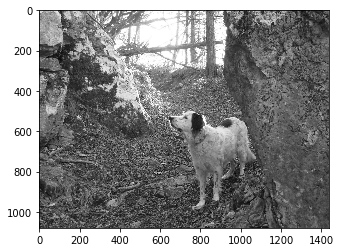

In [7]:
plt.imshow(gimg, cmap='gray')

Let's define this shorthand function to type a little less:

In [8]:
def gs(some_img):
    # vmin and vmax prevent normalization that occurs only with monochromatic images    
    plt.imshow(some_img, cmap='gray', vmin=0, vmax=255)

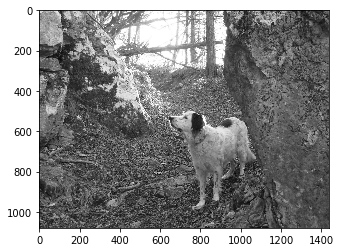

In [9]:
gs(gimg)

## Focus

Let's try some simple transformation. As with regular Python lists, we can do slicing:

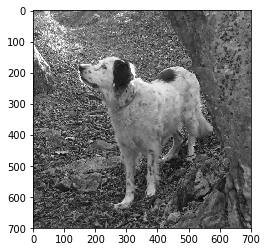

In [10]:
gs(gimg[350:1050,500:1200])

**NOTE 1**: differently from regular lists of lists,  in Numpy we can write slices for different dimensions **within the same square brackets**

**NOTE 2**: We are still talking about matrices, so pictures also follow the very same conventions of regular algebra we've also seen with lists of lists:  the first index is for rows and starts from 0 in the left upper corner, and second index is for columns.

**NOTE 3**: the indeces shown on the extracted picture are _not_ the indeces of the original matrix!

### Exercise - Head focus

Try selecting the head:

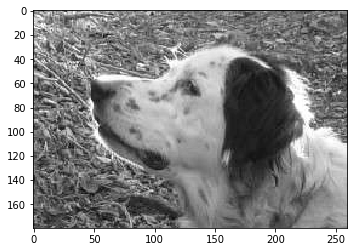

In [11]:
# write here

gs(gimg[470:650,600:860])

## `hstack` and `vstack`

We can stitch together pictures with `hstack` and `vstack`. Note they produce a NEW matrix:

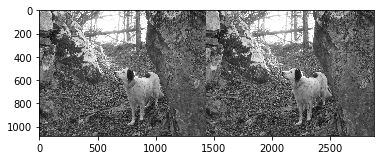

In [12]:
gs(np.hstack((gimg, gimg)))

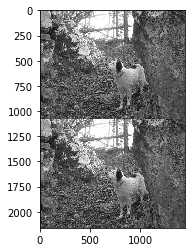

In [13]:
gs(np.vstack((gimg, gimg)))

### Exercise - Passport

Try to replicate somehow the head

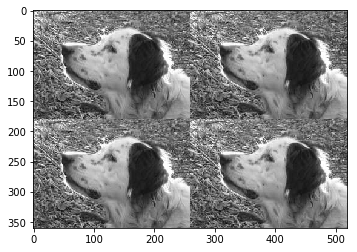

In [14]:
# write here
head = gimg[470:650,600:860]
col = np.vstack((head, head))
gs(np.hstack((col, col)))

## `flip`

A handy method for mirroring is [flip](https://numpy.org/doc/stable/reference/generated/numpy.flip.html):

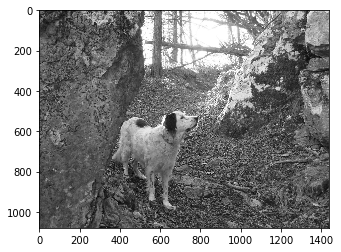

In [15]:
gs(np.flip(gimg, axis=1))

### Exercise - Too many

Try to replicate somehow the head, pointing it in different directions as in the example

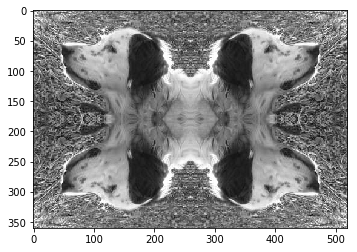

In [16]:
# write here
head = gimg[470:650,600:860]
col1 = np.vstack((head, np.flip(head, axis=0)))
gs(col1)
col2 = np.flip(col1, axis=0)
gs(np.hstack((col1,np.flip(col2))))

### Exercise - The nose from above

Do some googling and find an appropriate method for obtaining this:

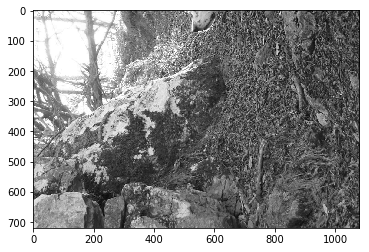

In [17]:
# write here

gs(np.rot90(gimg[:,:gimg.shape[1]//2]))

## Writing arrays

We can write into an array using square brackets:

In [18]:
arr = np.array([5,9,4,8,6])

In [19]:
arr[0] = 7

In [20]:
arr

array([7, 9, 4, 8, 6])

So far, nothing special. Let's try to make a slice:

In [21]:
                #0 1 2 3 4
arr1 = np.array([5,9,4,8,6])
arr2 = arr1[1:3]
arr2

array([9, 4])

In [22]:
arr2[0] = 7

In [23]:
arr2

array([7, 4])

In [24]:
arr1  # the original was modified !!!

array([5, 7, 4, 8, 6])

<div class="alert alert-warning">

**WARNING: SLICE CELLS IN NUMPY ARE POINTERS TO ORIGINAL CELLS!**

</div>

To prevent problems, you can create a _deep copy_ by using the `copy` method:

In [25]:
                #0 1 2 3 4
arr1 = np.array([5,9,4,8,6])
arr2 = arr1[1:3].copy()
arr2

array([9, 4])

In [26]:
arr2[0] = 7

In [27]:
arr2

array([7, 4])

In [28]:
arr1  # remained the same

array([5, 9, 4, 8, 6])

## Writing into images

Let's go back to images. First note that `gimg` was generated by calling `pt.imshow`, which set it as READ-ONLY:

```python
gimg[0,0] = 255  # NOT POSSIBLE WITH LOADED IMAGES!
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-186-7d21dd84cac2> in <module>()
----> 1 img[0,0,0] = 4  # NOT POSSIBLE!

ValueError: assignment destination is read-only
```

If we want something we can write into, we need to perform a **deep copy**:

In [29]:
mimg = gimg.copy()  # *DEEP* COPY
mimg[0,0] = 255  # the copy is writable
mimg[0,0]

255

If we want to set an entire slice to a constant value, we can write like this:

In [30]:
mimg[:, 300:400] = 255

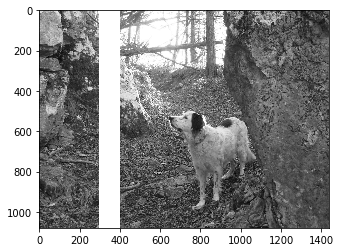

In [31]:
gs(mimg)

### Exercise - Stripes

Write a program that given top-left coordinates `tl` and bottom-right coordinates `br` creates a NEW image `nimg` with lines drawn like in the example:

* use a width of 5 pixels 

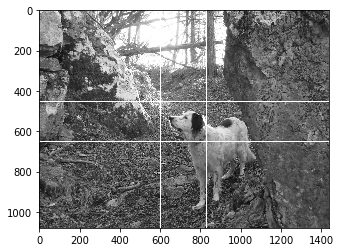

In [32]:

tl = (450,600)
br = (650,830)

# write here

nimg = gimg.copy()  # *DEEP* COPY
nimg[tl[0]:tl[0]+5, :] = 255
nimg[br[0]:br[0]+5, :] = 255
nimg[:, tl[1]:tl[1]+5] = 255
nimg[:, br[1]:br[1]+5] = 255

gs(nimg)

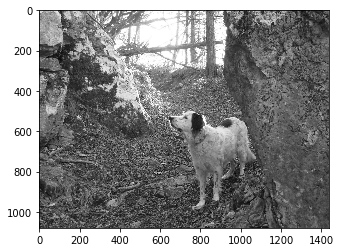

In [33]:
gs(gimg) # original must NOT change!

## In a dark integer night

Let's say we want to darken the scene. One simple approach would be to divide all the numbers by two: 


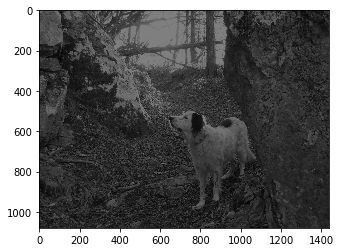

In [34]:
gs(gimg // 2)

In [35]:
gimg // 2

array([[104, 104, 105, ...,  58,  59,  58],
       [107, 107, 107, ...,  56,  58,  58],
       [108, 108, 108, ...,  52,  55,  57],
       ...,
       [ 18,  16,  15, ...,  36,  33,  32],
       [ 21,  18,  15, ...,  35,  32,  30],
       [ 18,  15,  12, ...,  34,  31,  30]], dtype=uint8)

If we divide by floats we get an array of floats:

In [36]:
gimg / 3.14

array([[66.56050955, 66.56050955, 66.87898089, ..., 37.2611465 ,
        37.57961783, 37.2611465 ],
       [68.15286624, 68.15286624, 68.47133758, ..., 35.66878981,
        36.94267516, 37.2611465 ],
       [69.10828025, 69.10828025, 69.10828025, ..., 33.43949045,
        35.03184713, 36.30573248],
       ...,
       [11.46496815, 10.50955414,  9.55414013, ..., 22.92993631,
        21.33757962, 20.38216561],
       [13.37579618, 11.46496815,  9.87261146, ..., 22.29299363,
        20.70063694, 19.42675159],
       [11.78343949,  9.87261146,  7.6433121 , ..., 21.65605096,
        20.06369427, 19.10828025]])

To go back to unsigned bytes, you can use `astype`:

In [37]:
(gimg / 3.0).astype(np.uint8) 

array([[69, 69, 70, ..., 39, 39, 39],
       [71, 71, 71, ..., 37, 38, 39],
       [72, 72, 72, ..., 35, 36, 38],
       ...,
       [12, 11, 10, ..., 24, 22, 21],
       [14, 12, 10, ..., 23, 21, 20],
       [12, 10,  8, ..., 22, 21, 20]], dtype=uint8)

We used division, because it guarantees we will never go below zero, which is important when working with unsigned bytes as we're doing here. Let's see what happens when we violate the datatype bounds.

### The Integer Shining

Intuitevely, if we want more light we can try increasing the matrices values but something terrible hides in the shadows....

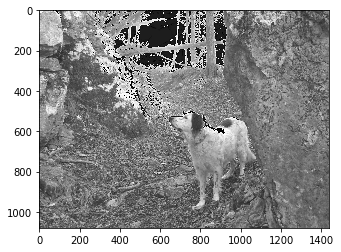

In [38]:
gs(gimg + 30)  # mmm something looks wrong ...

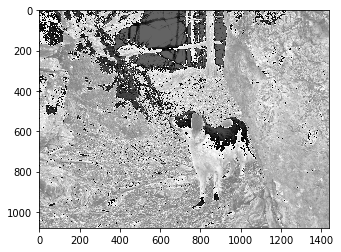

In [39]:
gs(gimg + 100)  # even worse!

Something really bad happened:

In [40]:
gimg + 100  

array([[ 53,  53,  54, ..., 217, 218, 217],
       [ 58,  58,  59, ..., 212, 216, 217],
       [ 61,  61,  61, ..., 205, 210, 214],
       ...,
       [136, 133, 130, ..., 172, 167, 164],
       [142, 136, 131, ..., 170, 165, 161],
       [137, 131, 124, ..., 168, 163, 160]], dtype=uint8)

Why do we get values less than < 100 ?? 

This is not so weird, technically it's called integer overflow and is the way CPU works with byte sized integers, so most programming languages actually behave like this. In regular Python you don't notice it because standard Python allows for arbitrary sized integers, but that comes at a big  performance cost that Numpy cannot afford, so in a sense we can say Numpy is 'closer to the metal' of the CPU.

Let's see a simpler example:

In [41]:
arr = np.zeros(3, dtype=np.uint8)  # unsigned 8 bit byte, values from 0 to 255 included

In [42]:
arr

array([0, 0, 0], dtype=uint8)

In [43]:
arr[0] = 255

In [44]:
arr

array([255,   0,   0], dtype=uint8)

In [45]:
arr[0] += 1  # cycles back to zero

In [46]:
arr 

array([0, 0, 0], dtype=uint8)

In [47]:
arr[0] -= 1  # cycles forward to 255

In [48]:
arr

array([255,   0,   0], dtype=uint8)

Going back to the image, how could we prevent exceeding the limit of 255?

`np.minimum` compares arrays cell by cell:

In [49]:
np.minimum(np.array([5,7,2]), np.array([9,4,8]))   

array([5, 4, 2])

As well as matrices:

In [50]:

m1 = np.array([[5,7,2],
               [8,3,1]])
m2 = np.array([[9,4,8],
               [6,0,3]])
np.minimum(m1, m2)

array([[5, 4, 2],
       [6, 0, 1]])

If you pass a constant, it will automatically compare all matrix cells against that constant:

In [51]:
np.minimum(m1, 2)

array([[2, 2, 2],
       [2, 2, 1]])

### Exercise - Be bright

Now try writing some code which enhances scene luminosity by adding `light=125` without distortions (you may still see some pixellation due to the fact we have taken just one color channel from the original image)

* **DO NOT** exceed 255 value for cells - if you see dark spots in your image where before there was white (i.e. background sky), it means color cycled back to small values!
* **DO NOT** write suff like `gimg + light`, this would surely exceed the 255 bound !!
* **MUST** have unsigned bytes as cells type

**HINT 1**: if direct sum is not the way, which safe operations are there which surely won't provoke any overflow?
**HINT 2**: you will need more than one step to solve the exercise

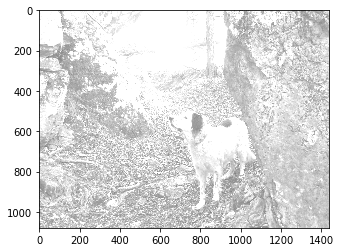

In [52]:
light=125
# write here
gs(gimg + np.minimum(255 - gimg, light))

## RGB - Get colorful

Let's get a third dimension for representing colors. Our new third dimension will have three planes of integers, in this order:

0: **R**ed

1: **G**reen

2: **B**lue

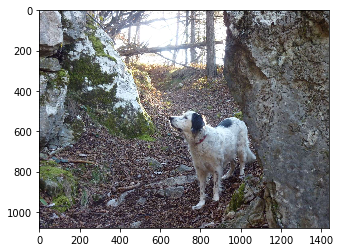

In [53]:
plt.imshow(img)

In [54]:
type(img)

numpy.ndarray

In [55]:
img.shape

(1080, 1440, 3)

Each pixel is represented by three integer values:

In [56]:
print(img)

[[[209 223 236]
  [209 223 236]
  [210 224 237]
  ...
  [117 132 139]
  [118 132 141]
  [117 131 140]]

 [[214 228 241]
  [214 228 241]
  [215 229 242]
  ...
  [112 127 134]
  [116 131 138]
  [117 131 140]]

 [[217 229 243]
  [217 229 243]
  [217 229 243]
  ...
  [105 120 127]
  [110 125 132]
  [114 129 136]]

 ...

 [[ 36  28  49]
  [ 33  25  46]
  [ 30  22  43]
  ...
  [ 72  78  90]
  [ 67  73  87]
  [ 64  70  84]]

 [[ 42  34  55]
  [ 36  28  49]
  [ 31  23  44]
  ...
  [ 70  76  88]
  [ 65  71  85]
  [ 61  67  81]]

 [[ 37  29  50]
  [ 31  23  44]
  [ 24  16  37]
  ...
  [ 68  74  86]
  [ 63  69  83]
  [ 60  66  80]]]


Given a pixel coordinates, like `0,0`, we can extract the color with a third coordinate like this:

In [57]:
img[0,0,0]  # red

209

In [58]:
img[0,0,1]  # green

223

In [59]:
img[0,0,2]  # blue

236

In [60]:
img[0,0]   # result is an array with three RGB colors

array([209, 223, 236], dtype=uint8)

## Exercise - Focus - top left

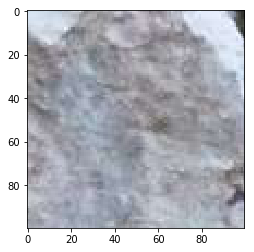

In [61]:
plt.imshow(img[:100,:100,:])

## Exercise - Focus - bottom - left

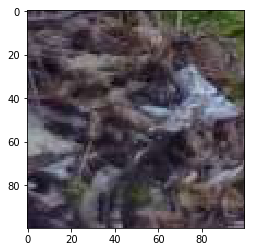

In [62]:
# write here
plt.imshow(img[-100:,:100,:])

## Exercise - Focus - bottom - right 

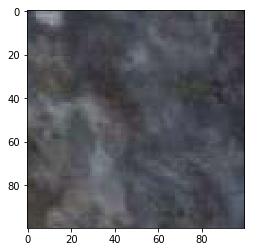

In [63]:
# write here
plt.imshow(img[-100:,-100:,:])

## Exercise - Focus - top - right

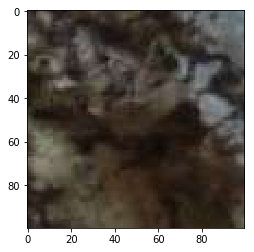

In [64]:
# write here
plt.imshow(img[:100,-100:,:])

## Exercise - Look the other way

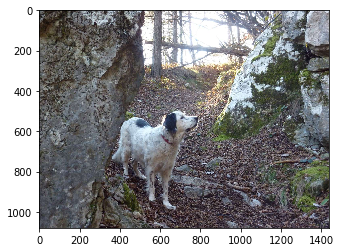

In [65]:
# write here
plt.imshow(np.fliplr(img))

## Exercise - Upside down world

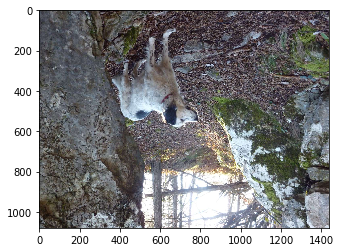

In [66]:
# write here
plt.imshow(np.fliplr(np.flipud(img)))

## Exercise - Shrinking Walls - X

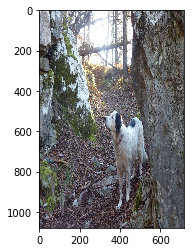

In [67]:
# write here
plt.imshow(img[:,::2,:])

## Exercise - Shrinking Walls - Y

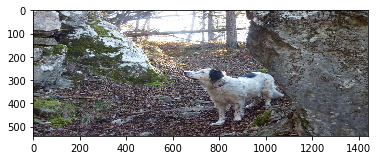

In [68]:
# write here
plt.imshow(img[::2,:,:])

## Exercise - Shrinking World

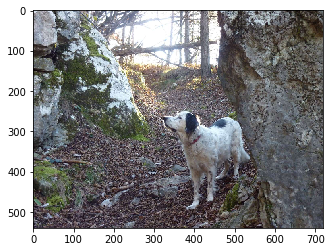

In [69]:
# write here
plt.imshow(img[::2,::2,:])

## Exercise - Pixellate

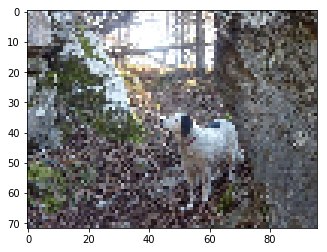

In [70]:
# write here
plt.imshow(img[::15,::15,:])

## Exercise - Feeling Red

Create a NEW image where you only see red

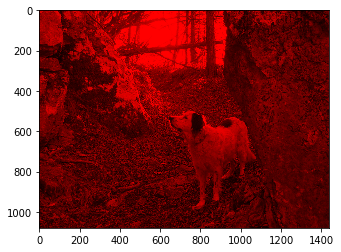

In [71]:
# write here
mimg = img.copy()
mimg[:,:,2] = 0
mimg[:,:,1] = 0
plt.imshow(mimg)

## Exercise - Feeling Green

Create a NEW image where you only see green

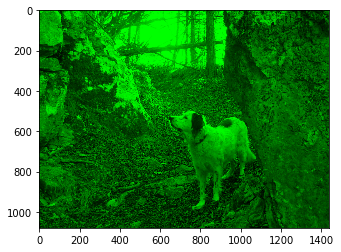

In [72]:
# write here
mimg = img.copy()
mimg[:,:,0] = 0
mimg[:,:,2] = 0
plt.imshow(mimg)

## Exercise - Feeling Blue

Create a NEW image where you only see blue

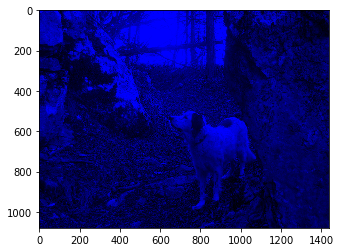

In [73]:
# write here
mimg = img.copy()
mimg[:,:,0] = 0
mimg[:,:,1] = 0
plt.imshow(mimg)

## Exercise - No Red

Create a NEW image without red

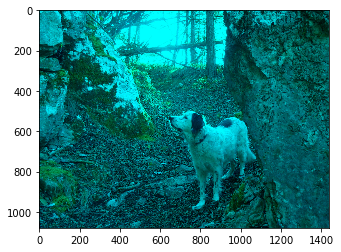

In [74]:
# write here
mimg = img.copy()
mimg[:,:,0] = 0
plt.imshow(mimg)

## Exercise - No Green

Create a NEW image without green

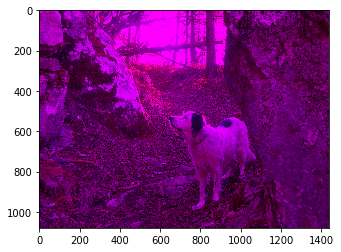

In [75]:
# write here
mimg = img.copy()
mimg[:,:,1] = 0
plt.imshow(mimg)

## Exercise - No Blue

Create a NEW image without blue

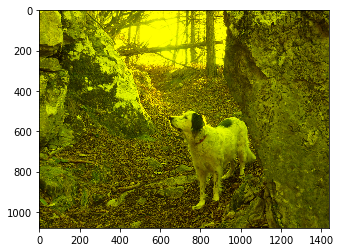

In [76]:
# write here
mimg = img.copy()
mimg[:,:,2] = 0
plt.imshow(mimg)

## Exercise - Feeling Gray again

Given an RGB image, set all the values equal to red channel

[[[209 209 209]
  [209 209 209]
  [210 210 210]
  ...
  [117 117 117]
  [118 118 118]
  [117 117 117]]

 [[214 214 214]
  [214 214 214]
  [215 215 215]
  ...
  [112 112 112]
  [116 116 116]
  [117 117 117]]

 [[217 217 217]
  [217 217 217]
  [217 217 217]
  ...
  [105 105 105]
  [110 110 110]
  [114 114 114]]

 ...

 [[ 36  36  36]
  [ 33  33  33]
  [ 30  30  30]
  ...
  [ 72  72  72]
  [ 67  67  67]
  [ 64  64  64]]

 [[ 42  42  42]
  [ 36  36  36]
  [ 31  31  31]
  ...
  [ 70  70  70]
  [ 65  65  65]
  [ 61  61  61]]

 [[ 37  37  37]
  [ 31  31  31]
  [ 24  24  24]
  ...
  [ 68  68  68]
  [ 63  63  63]
  [ 60  60  60]]]


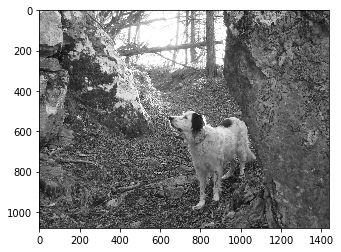

In [77]:
# write here
mimg = img.copy()
mimg[:,:,1] = mimg[:,:,0]
mimg[:,:,2] = mimg[:,:,0]
plt.imshow(mimg)
print(mimg)

## Exercise - Beyond the limit

... weird things happen:

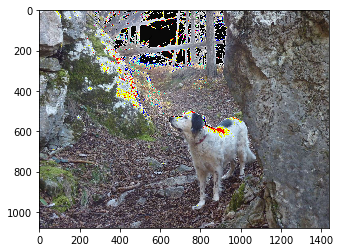

In [78]:
plt.imshow(img + 10)

In [79]:
mimg = img.copy()
mimg[0,0,0] = 255  # limit !!
mimg[0,0,0]

255

In [80]:
mimg[0,0,0] += 1   # integer overflow, cycles back - note it does not happen in regular Python !

In [81]:
mimg[0,0,0]         

0

Note this is not so weird, technically this is called overflow and us the way CPU works with byte sized integers, so most programming languages actually behave like this.

You can get the same problem when subtracting:

In [82]:
mimg[0,0,0] = 0     # limit !!
mimg[0,0,0] -= 1    # integer overflow , cycles forward
mimg[0,0,0]

255

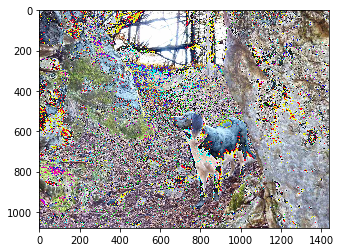

In [83]:
plt.imshow(img + img)

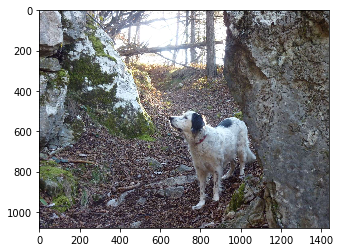

In [84]:
plt.imshow(img)  # + operator didn't change original image

## Exercise - Gimme light

Increment all the RGB values of `light`, **without overflowing**

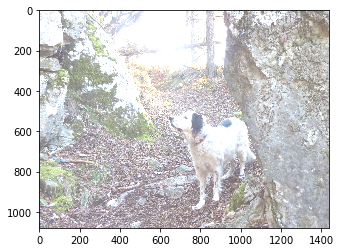

In [85]:
light = 100

# write here
plt.imshow(img + np.minimum(255 - img, light))

## Exercise - When the darkness comes - with a warning

Decrement all values by `light`. As a first attempt, a result with a warning might be considered acceptable.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


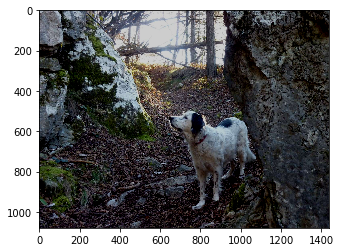

In [86]:
light = -50
# write here
plt.imshow(img + np.minimum(255 - img, light))

## Exercise - When the darkness comes - without a warning

Decrement all RGB values by `light`, **without overflowing nor warnings**

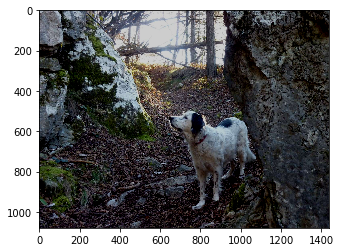

In [87]:
light=50
# write here
plt.imshow(img - np.minimum(img, light))

## Exercise - Fade to black

Fade the gray picture to black from left to right. Try using `np.linspace` and `np.tile`

First create the `horiz_fade`:

In [88]:
# write here
ls = np.linspace(255,0,gimg.shape[1])
horiz_fade = np.tile(ls, (gimg.shape[0],1))

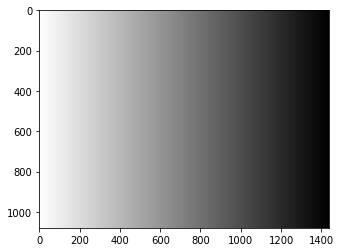

In [89]:
gs(horiz_fade)

Then apply the fade - notice that by 'applying' we mean subtracting the fade (so white in the fade will actually correspond to dark in the picture)

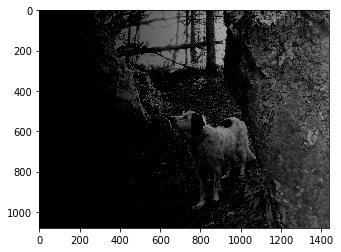

In [90]:
# write here
gs(gimg - np.minimum(gimg, horiz_fade))

## Exercise - vertical fade

(harder) First create a `vertical_fade`:

In [91]:
# write here

ls = np.linspace(0,255,gimg.shape[0])
vertical_fade = np.repeat(ls, gimg.shape[1]).reshape(gimg.shape[0], gimg.shape[1])

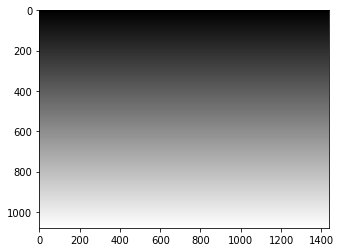

In [92]:
gs(vertical_fade)

Then apply the fade:

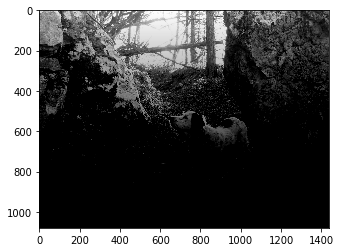

In [93]:
# write here
gs(gimg - np.minimum(gimg, vertical_fade))